In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
tweet_df = pd.read_csv('train.csv')

In [3]:
tweet_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run 

@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked 

  bihday your majesty 

#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦   

 factsguide: society now    #motivation 



In [6]:
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|http\S+|www\S+",'',tweet,flags=re.MULTILINE)
    tweet = re.sub(r'@\w+|\#','',tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub(r'ð','',tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweets)

In [7]:
tweet_df.tweet = tweet_df['tweet'].apply(data_processing)

In [8]:
tweet_df = tweet_df.drop_duplicates('tweet')

In [9]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data

In [10]:
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: lemmatizing(x))

In [11]:
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

father dysfunctional selfish drags kids dysfunction run 

thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked 

bihday majesty 

model love u take u time ur 

factsguide society motivation 



In [12]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28424 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      28424 non-null  int64 
 1   label   28424 non-null  int64 
 2   tweet   28424 non-null  object
dtypes: int64(2), object(1)
memory usage: 888.2+ KB


In [13]:
tweet_df['label'].value_counts()

0    26559
1     1865
Name: label, dtype: int64

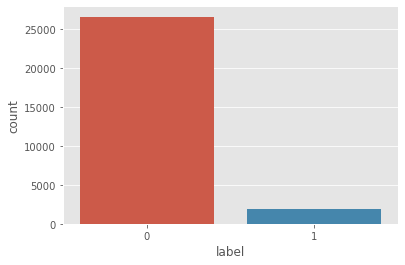

In [14]:
sns.countplot(x='label',data=tweet_df)
plt.show()

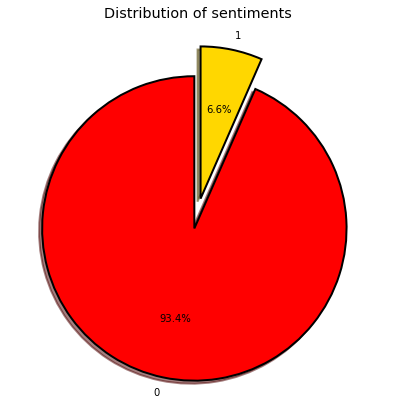

In [15]:
fig = plt.figure(figsize=(7,7))
colors = ("red","gold")
wp = {'linewidth':2,'edgecolor':'black'}
tags = tweet_df['label'].value_counts()
explode = (0.1,0.1)
tags.plot(kind='pie',autopct='%1.1f%%',shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label='')
plt.title('Distribution of sentiments')
plt.show()

In [16]:
non_hate_tweets = tweet_df[tweet_df['label']==0]
non_hate_tweets.head()

,id,label,tweet
0,1,0,father dysfunctional selfish drags kids dysfun...
1,2,0,thanks lyft credit cant use cause dont offer w...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


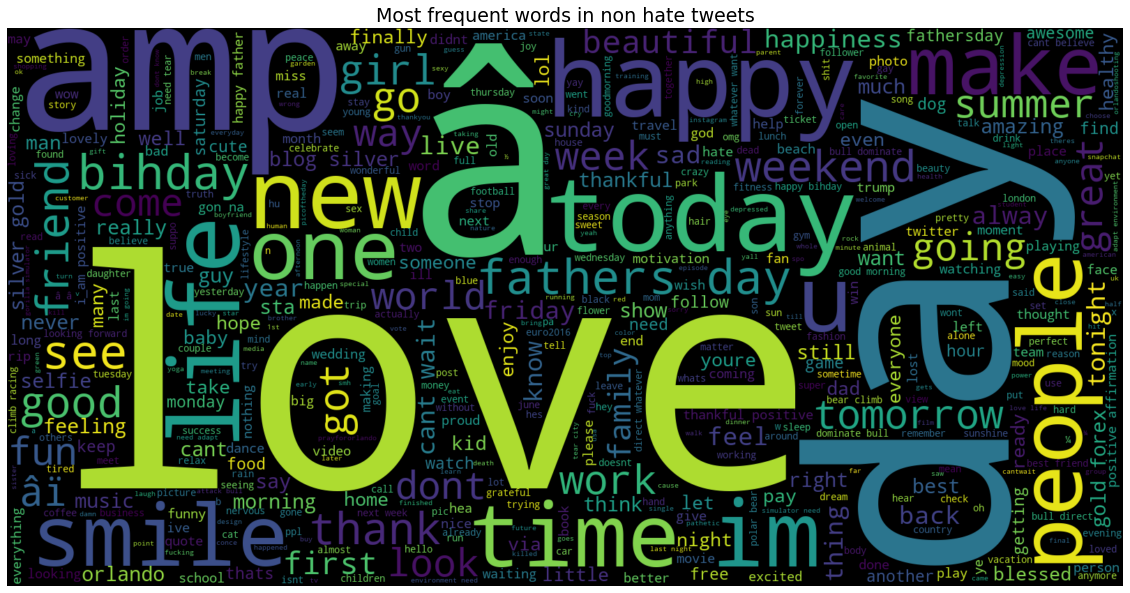

In [17]:
text =  ' '.join([i for i in non_hate_tweets['tweet']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud = WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in non hate tweets',fontsize=19)
plt.show()

In [18]:
hate_tweets = tweet_df[tweet_df['label']==1]
hate_tweets.head()

,id,label,tweet
13,14,1,cnn calls michigan middle school build wall ch...
14,15,1,comment australia opkillingbay seashepherd hel...
17,18,1,retweet agree
23,24,1,lumpy says prove lumpy
34,35,1,unbelievable 21st century wed need something l...


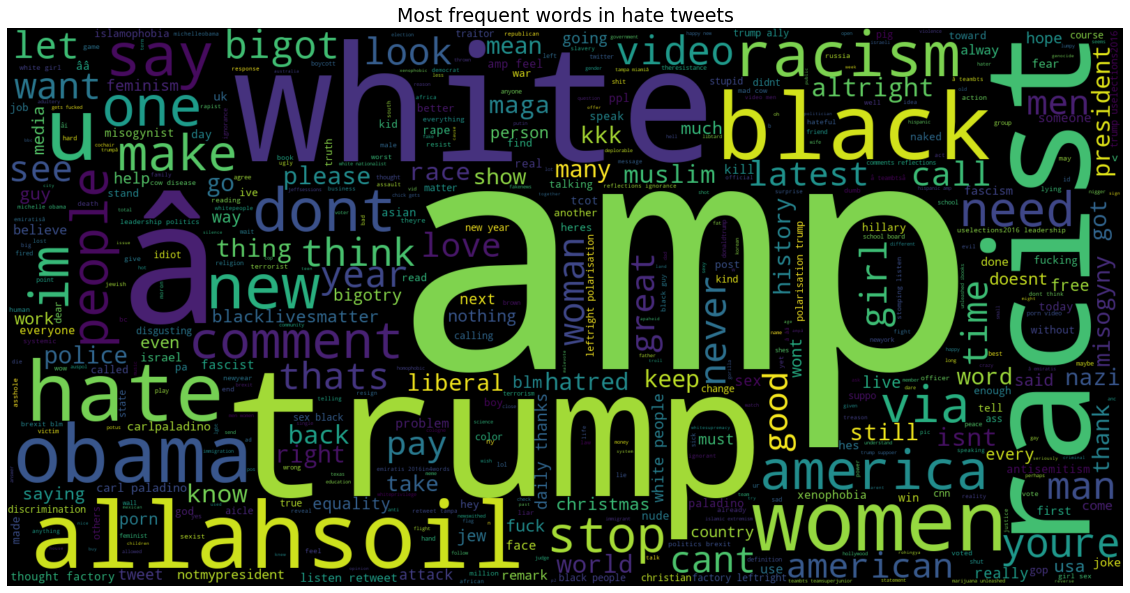

In [19]:
text =  ' '.join([i for i in hate_tweets['tweet']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud = WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in hate tweets',fontsize=19)
plt.show()

In [20]:
vect = TfidfVectorizer(ngram_range=(1,2)).fit(tweet_df['tweet'])

In [21]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 204379

First 20 features: 
['0000001', '0000001 polluting', '00027', '00027 photooftheday', '001', '0035', '00h30', '01', '01 4995', '01 7900', '01 blog', '01 croatia', '01 may', '01 shopalyssas', '0115', '0115 8599968', '0161', '0161 manny', '019', '019 previous']


In [22]:
vect = TfidfVectorizer(ngram_range=(1,3)).fit(tweet_df['tweet'])

In [23]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 363556

First 20 features: 
['0000001', '0000001 polluting', '0000001 polluting niger', '00027', '00027 photooftheday', '00027 photooftheday music', '001', '0035', '00h30', '01', '01 4995', '01 4995 rustic', '01 7900', '01 7900 shopalyssas', '01 blog', '01 blog silver', '01 croatia', '01 croatia happy', '01 may', '01 may actual']


In [24]:
X = tweet_df['tweet']
Y = tweet_df['label']
X = vect.transform(X)

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42,test_size=0.2)

In [26]:
print("size of x_train:",x_train.shape)
print("size of x_test:",x_test.shape)
print("size of y_train:",y_train.shape)
print("size of y_test:",y_test.shape)

size of x_train: (22739, 363556)
size of x_test: (5685, 363556)
size of y_train: (22739,)
size of y_test: (5685,)


In [27]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(y_test,logreg_predict)
print("The accuracy is {:.2f}%".format(logreg_acc*100))

The accuracy is 93.47%


In [28]:
print(confusion_matrix(y_test,logreg_predict))
print("\n")
print(classification_report(y_test,logreg_predict))

[[5301    0]
 [ 371   13]]


              precision    recall  f1-score   support

           0       0.93      1.00      0.97      5301
           1       1.00      0.03      0.07       384

    accuracy                           0.93      5685
   macro avg       0.97      0.52      0.52      5685
weighted avg       0.94      0.93      0.91      5685



In [29]:
y_test.value_counts()

0    5301
1     384
Name: label, dtype: int64

In [30]:
from sklearn import svm

In [31]:
svc = svm.SVC()
svc.fit(x_test,y_test)
svc_predict = svc.predict(x_test)

In [32]:
print(confusion_matrix(y_test,svc_predict))
print("\n")
print(classification_report(y_test,svc_predict))

[[5301    0]
 [ 188  196]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5301
           1       1.00      0.51      0.68       384

    accuracy                           0.97      5685
   macro avg       0.98      0.76      0.83      5685
weighted avg       0.97      0.97      0.96      5685



In [33]:
svc_acc = accuracy_score(y_test,svc_predict)
print("The accuracy is {:.2f}%".format(svc_acc*100))

The accuracy is 96.69%
